## ANN MNIST Classification


In [43]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
from torchvision.io import read_image
from torchvision import datasets
from torch import cuda

In [13]:
#Load the dataset
train_dataset = torchvision.datasets.MNIST( root = '.', train = True, download = True) 
x_train  = train_dataset.data # shape of NX28X28 since they are the images
y_train = train_dataset.targets # shape of N since they are the class labels where N = 60,000

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:24<00:00, 406kB/s] 


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 33.3kB/s]


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:10<00:00, 164kB/s] 


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 906kB/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [67]:
print(train_dataset)
print(x_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

In [65]:
print(train_dataset.data.max())
print(train_dataset.data.shape)
print(train_dataset.targets)
print(train_dataset.targets.shape)

tensor(255, dtype=torch.uint8)
torch.Size([60000, 28, 28])
tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


In [105]:
#Getting train data
train_dataset = torchvision.datasets.MNIST(root = '.', train = True, transform = transforms.ToTensor(), download = True)
print(train_dataset.data.shape)
#Getting test data
test_dataset = torchvision.datasets.MNIST(root = '.', train = False, transform = transforms.ToTensor(), download = True)
test_dataset.data.shape


torch.Size([60000, 28, 28])


torch.Size([10000, 28, 28])

In [107]:
#Build Model 
model = nn.Sequential( nn.Linear(784,128), nn.ReLU(), nn.Linear(128,10) ) #transforms 784X128 matrix into 128X10
#No need for final softmax as it has been combined with cross entropy for numerical stability. 
#Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())


In [109]:
#Making use of GPU:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [111]:
#Data loader. Useful because it automatically generates batches in the training loop and takes care of shuffling. 
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True) 
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False) 

In [115]:
#for fun let's just check out what the data loader does 

tmp_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 1, shuffle = True)
for x,y in tmp_loader:
    print(x)
    print(x.shape)
    print(y.shape)
    break


tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [117]:
train_dataset.transform(train_dataset.data.numpy()).max() #outputting the the maximum number in the tensor

tensor(1.)

In [120]:

# Now you can proceed with training the model as before
n_epochs = 10

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):
    train_loss = []
    for inputs, targets in train_loader:
        # Move data to GPU if possible
        inputs, targets = inputs.to(device), targets.to(device) 
        
        # Reshape the input 
        inputs = inputs.view(-1, 784) 

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

    train_loss = np.mean(train_loss)

    # We can't calculate the test loss all at once because it may not fit into memory 
    test_loss = []
    for inputs, targets in test_loader: 
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 784)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())

    test_loss = np.mean(test_loss)
    
    # Save Losses
    train_losses[i] = train_loss
    test_losses[i] = test_loss
    print(f'Epoch {i+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/10, Train Loss: 0.0328, Test Loss: 0.0720
Epoch 2/10, Train Loss: 0.0272, Test Loss: 0.0685
Epoch 3/10, Train Loss: 0.0235, Test Loss: 0.0728
Epoch 4/10, Train Loss: 0.0203, Test Loss: 0.0668
Epoch 5/10, Train Loss: 0.0174, Test Loss: 0.0735
Epoch 6/10, Train Loss: 0.0153, Test Loss: 0.0711
Epoch 7/10, Train Loss: 0.0125, Test Loss: 0.0761
Epoch 8/10, Train Loss: 0.0114, Test Loss: 0.0772
Epoch 9/10, Train Loss: 0.0094, Test Loss: 0.0802
Epoch 10/10, Train Loss: 0.0077, Test Loss: 0.0765


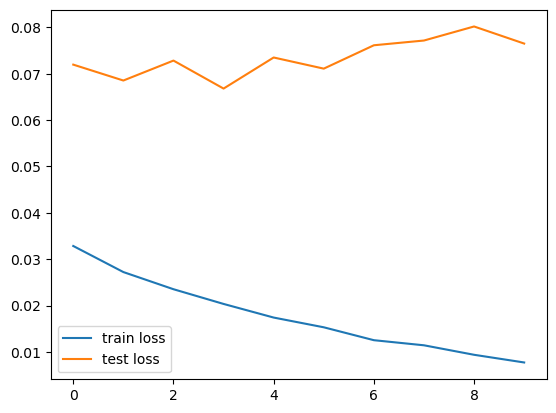

In [122]:
#Plot the train loss and test loss per iteration:
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

THe above graph indicates the model has been overfit. Why is that? 

In [130]:
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
    #move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    #reshape input
    inputs = inputs.view(-1,784)
    #forward pass
    outputs = model(inputs)
    #get prediction, torch.max returns both max and argmax
    _, predictions = torch.max(outputs,1)
    #update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct/n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9992, Test acc: 0.9992


In [136]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1) [:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    
    print(cm)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt), horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Confusion matrix without normalization
[[ 969    0    1    1    0    1    4    2    1    1]
 [   0 1124    4    0    0    1    2    1    3    0]
 [   3    2 1009    4    1    0    2    4    6    1]
 [   0    0    2  987    0    6    0    3    3    9]
 [   1    0    5    0  964    0    3    2    1    6]
 [   2    1    0    6    1  874    3    1    3    1]
 [   4    2    2    1    4    6  938    0    1    0]
 [   1    5    9    1    0    0    0 1002    1    9]
 [   6    0    5    3    6    3    1    4  943    3]
 [   1    2    0    4    7    3    1    4    3  984]]


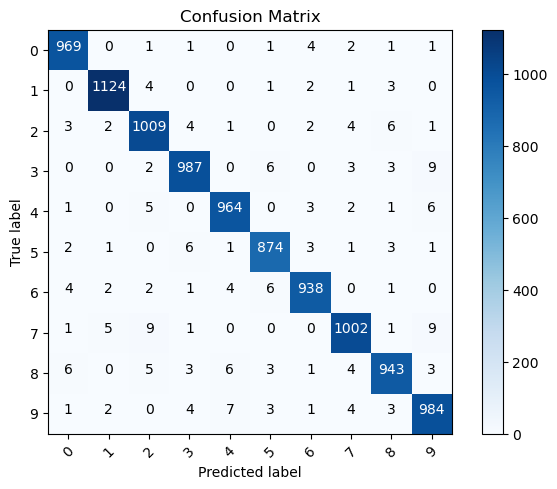

In [138]:
# Get all predictions in an array and plot confusion matrix 

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
    #move data to gpu
    inputs = inputs.to(device)
    #reshape the input
    inputs = inputs.view(-1,784)
    #Forward pass
    outputs = model(inputs)
    #get predictions 
    _, predictions = torch.max(outputs,1)
    #update p_test
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

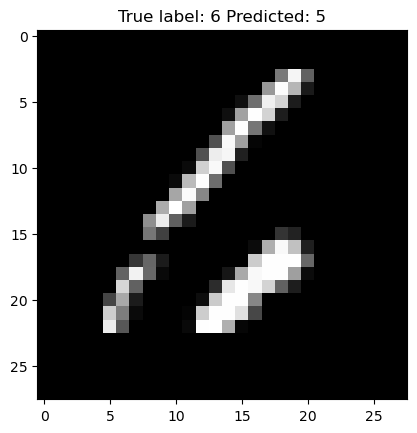

In [140]:
#Show some misclassified Examples:
misclassified_idx = np.where(p_test != y_test) [0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], int(p_test[i])));